<a href="https://colab.research.google.com/github/kclassie/HSE_Open_Data_Cource/blob/main/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Блокнот для лекции по основам анализа текстовых данных

## **Задача:** освоить базовые приемы компьютерной лингвистики для анализа текстов, познакомиться с python-библиотеками pymorphy2, nltk и модулем для работы с регулярными выражениями re.

На примере текстов посланий президента РФ Федеральному собранию 2015, 2016, 2018, 2019, 2020, 2021 гг. 


**Источник**: http://kremlin.ru/events/president/transcripts/messages


##pymorphy2 
библиотека для морфологического анализа слов на русском языке

Документация: https://pymorphy2.readthedocs.io/en/stable/

##NLTK (Natural Language Toolkit)
пакет библиотек и программ для символьной и статистической обработки естественного языка

Документация: https://www.nltk.org/



In [ ]:
#установка библиотек (если они не установлены)

!pip install pymorphy2  #библиотека для морфологического анализа слов
!pip install nltk       #пакет библиотек и программ для символьной и статистической обработки естественного языка

In [ ]:
#устанавливаем и импортируем инеобходимые библиотеки и модули
          
import nltk
import pymorphy2 as pm
import pandas as pd                       
from nltk import word_tokenize    #для токенизации слов
from nltk.corpus import stopwords #стоп-слова, которые мы не будем использовать в выборке
nltk.download('stopwords')
nltk.download('punkt')


from collections import Counter
import re

'''
re - это стандартный питоновский модуль для работы с регулярными выражениями.
если вы не знаете, что такое регулярные выражения, очень рекомендую изучить эту тему. 
На Data Camp есть очень понятный и хороший курс, который займет всего несколько часов, 
но даст достаточное представление о регулярных выражениях. 

А используются они в анализе данных (и во многом другом) оооооочень часто.'''

In [ ]:
#тексты всех посланий я сохранила на гугл-диске в формате txt
#загрузим их и объединяем тексты из файлов в один список, где каждый элемент списка - это длиииинная строка, содержащая текст одного послания

poslaniya = []
years = ["2021", "2020", "2019", "2018", "2016", "2015"]
for y in years:
  poslaniya.append(open(f'/content/drive/MyDrive/Датасеты разные/poslanie_{y}.txt').read())

print(len(poslaniya)) #посмотрим длину списка - сколько текстов загрузилось?

6


In [ ]:
poslaniya[0]

' Уважаемые члены Совета Федерации, депутаты Государственной Думы! Уважаемые граждане России!\n\nСегодняшнее Послание будет посвящено главным образом нашим внутренним вопросам. Это, разумеется, вопросы здравоохранения, социальной политики, экономики. Конечно, несколько слов нужно будет сказать о внешних делах, буквально несколько слов и по вопросам безопасности.\n\nНо начну, конечно, с событий прошлого года, когда наша страна да и, собственно, весь мир столкнулись с новой, неизвестной и чрезвычайно опасной инфекцией.\n\nВ те дни, в том числе в ходе совещаний со специалистами и разговоров с лидерами многих государств, часто слышал от них такую оценку ситуации: мы имеем дело с абсолютной неопределённостью. И это действительно было так.\n\nВидел это по информации из наших регионов. Число заболевших, которым требовалась срочная госпитализация, постоянно росло. Собственно, все и так об этом хорошо знают. Многие больницы были переполнены, сообщали о реальной угрозе нехватки кислорода, в том 

#Здесь нужно сказать о нескольких понятиях из компьютерной лингвистики

##Базовые термины - они же этапы обработки текста. Детали всегда определяет аналитик/исследователь, в зависимости от цели анализа и особенностей теста (!)

1. **Корпус** - в компьютерной лингвистике это подобранная и обработанная по определенным правилам совокупность текстов, используемых в качестве базы для исследования. Для нас это **набор данных из текстов**.

**Примеры**:
- корпус комментариев из соцсети;
- корпус новостей определенного СМИ;
- корпус статей в СМИ об определенной персоне за определенный период;\
- и т.д.

2. **Токенизация** - разбиение текста на слова или определение границ слова. (**Токен** - это одно слово в той форме, в котрой оно представлено в тексте).

3. **Лемматизация** - приведение слова к начальной форме (**Лемма** - токен, приведенный к начальной форме. Например: маме - мама, жил - жить, студенты - студент и т.д.)

4. **Шумовые слова (или стоп-слова)** — такие слова, знаки, символы, которые самостоятельно не несут никакой смысловой нагрузки (предлоги, суффиксы, причастия, междометия, цифры, частицы и т. п.)


In [ ]:
#помотрим, какие стоп-слова для русского языка есть в NLTK

print(len(stopwords.words('russian')))
stopwords.words('russian').append('быть')
print(stopwords.words('russian'))

151
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 

In [ ]:
#токенизируем наши тексты и посмотрим на количество слов в каждом из текстов.

for i in poslaniya:
  i=re.split(r'\W+', i) #здесь для разделения применяем регулярное выражение. Разбиение по не-букве, не-цифре и не-подчеркиванию
  print(f'Количество слов = {len(i)}')

# Хм, президент был наиболее словоохотливым в 2018 году ;)

Количество слов = 7942
Количество слов = 7567
Количество слов = 9869
Количество слов = 11496
Количество слов = 7390
Количество слов = 6141


In [ ]:
# Считаем частотность - сколько раз в каждом из текстов встречается каждая уникальная лемма. Иначе говоря, считаем размер "словарного запаса" каждого текста.

# Сначала уберем из текстов все цифры, всякие там знаки препинания, потом исключим стоп-слова и, на всякий случай, еще и служебные части речи.
# Лемматизируем - приводим оставшиеся слова в начальную форму. И формируем для каждого из текстов словарь, где ключ - слово, а значение - количестве его повторов в тексте.
# Это все происходит достаточно долго 8(( Внизу печатается число лемм для каждого из текстов

a = pm.MorphAnalyzer()
word_frequency = [] #здесь будет список из 5 словарей {лем}
putin_verbs = {}
for text in poslaniya:
  text = re.sub(r"\d+", "", text) #здесь опять регулярные выражения. Так мы уберем из текстов все цифры - они же слова.
  text = re.split(r'\W+', text) #это регулярное выражение вам уже знакомо
  vocab = {}
  for i in text:
    m = a.parse(i)[0]  #здесь подключаем к работе pymorthy, чтобы определить часть речи каждого слова
    if m not in stopwords.words('russian'): #исключаем стоп-слова
      if m.tag.POS=='INFN' or m.tag.POS=='VERB': #отдельно обрабатываем глаголы (если хотим существительные - тэг 'NOUN', если прилагательные - 'ADJF' or 'ADJS' - и т.д.)
        m=m.normal_form
        if m not in putin_verbs: #добавляем в отдельный словарь - один на все пять текстов
          putin_verbs[m] = 1
        else:        
          putin_verbs[m] += 1
      elif m.tag.POS not in ['PREP', 'CONJ', 'PRCL', 'INTJ', 'NPRO']: #исключаем разные служебные части речи (указываем тэги ненужных, подробнее: https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html  )
        m=m.normal_form #приводим слово в начальную форму
        if m not in vocab: 
          vocab[m] = 1  #добавляем слово в словарь для каждого текста
        else:        
          vocab[m] += 1 #если слово уже есть в тексте, увеличиваем счетчик (значение по ключу m) на единицу
  print(len(vocab))
  word_frequency.append(vocab)


1601
1386
1784
1876
1498
1405


In [ ]:
print(word_frequency[0])

{'': 2, 'уважаемый': 12, 'член': 4, 'совет': 4, 'федерация': 12, 'депутат': 1, 'государственный': 10, 'дума': 2, 'гражданин': 25, 'россия': 51, 'сегодняшний': 2, 'послание': 3, 'посвятить': 1, 'главный': 5, 'образ': 3, 'наш': 43, 'внутренний': 2, 'вопрос': 11, 'здравоохранение': 8, 'социальный': 12, 'политика': 6, 'экономика': 13, 'несколько': 4, 'слово': 6, 'нужно': 32, 'внешний': 2, 'дело': 7, 'буквально': 4, 'безопасность': 8, 'событие': 2, 'прошлое': 4, 'год': 68, 'страна': 37, 'весь': 43, 'мир': 13, 'новый': 37, 'неизвестный': 1, 'чрезвычайно': 3, 'опасный': 4, 'инфекция': 5, 'тот': 50, 'день': 8, 'число': 18, 'ход': 3, 'совещание': 1, 'специалист': 5, 'разговор': 1, 'лидер': 2, 'многий': 9, 'государство': 11, 'часто': 2, 'такой': 49, 'оценка': 1, 'ситуация': 16, 'абсолютный': 3, 'неопределённость': 1, 'действительно': 4, 'информация': 1, 'регион': 30, 'заболеть': 1, 'который': 41, 'срочный': 1, 'госпитализация': 1, 'постоянно': 2, 'хорошо': 8, 'больница': 3, 'переполнить': 1, 'ре

In [ ]:
# отсортируем слова каждого из текстов по числу повторений
sorted_by_value = []
for i in word_frequency:
  sort = sorted(i.items(), key=lambda kv: kv[1])
  sorted_by_value.append(sort)

In [ ]:
#выведем ТОП-20 
for i in sorted_by_value:
  print(f'Текст № {sorted_by_value.index(i)+1}, 20 самых частых слов:')
  print('\n'.join(map(str, i[-20:])))
  print('\n')

Текст № 1, 20 самых частых слов:
('здесь', 25)
('проект', 25)
('ребёнок', 27)
('другой', 28)
('регион', 30)
('человек', 30)
('нужно', 32)
('развитие', 34)
('страна', 37)
('новый', 37)
('который', 41)
('наш', 43)
('весь', 43)
('уже', 46)
('должный', 46)
('такой', 49)
('тот', 50)
('россия', 51)
('этот', 53)
('год', 68)


Текст № 2, 20 самых частых слов:
('развитие', 23)
('федеральный', 24)
('нужно', 24)
('регион', 29)
('гражданин', 31)
('свой', 31)
('такой', 35)
('уже', 35)
('семья', 37)
('тот', 40)
('человек', 43)
('ребёнок', 43)
('этот', 43)
('который', 44)
('наш', 47)
('россия', 50)
('страна', 50)
('весь', 50)
('должный', 58)
('год', 66)


Текст № 3, 20 самых частых слов:
('новый', 26)
('более', 26)
('ещё', 29)
('свой', 34)
('только', 35)
('страна', 36)
('работа', 37)
('семья', 38)
('тот', 45)
('россия', 48)
('нужно', 49)
('уже', 50)
('весь', 51)
('такой', 53)
('наш', 55)
('который', 56)
('человек', 56)
('должный', 67)
('этот', 83)
('год', 95)


Текст № 4, 20 самых частых слов:
('один

In [ ]:
#соберем все это в табличку

table = pd.DataFrame(sorted_by_value)
table = table.T   #свойство для транспонирования DataFrame по диагонали, то есть строки записываются как столбцы и наоборот.
table.rename(columns={0: '2021', 1: '2020', 2: '2019', 3: '2018', 4: '2016', 5: '2015'}, inplace=True)

In [ ]:
table

,2021,2020,2019,2018,2016,2015
0,"(депутат, 1)","(откладывать, 1)","(совет, 1)","(депутат, 1)","(добрый, 1)","(благодарность, 1)"
1,"(посвятить, 1)","(содержание, 1)","(сосредоточить, 1)","(дума, 1)","(член, 1)","(георгиевский, 1)"
2,"(неизвестный, 1)","(отразить, 1)","(развернуть, 1)","(рубежный, 1)","(обычно, 1)","(воинский, 1)"
3,"(совещание, 1)","(управление, 1)","(динамичный, 1)","(судьба, 1)","(неординарный, 1)","(слава, 1)"
4,"(разговор, 1)","(диалог, 1)","(спрессовать, 1)","(поворотный, 1)","(суверенитет, 1)","(представитель, 1)"
...,...,...,...,...,...,...
1871,None,None,None,"(должный, 74)",None,None
1872,None,None,None,"(этот, 75)",None,None
1873,None,None,None,"(россия, 85)",None,None
1874,None,None,None,"(наш, 91)",None,None


In [ ]:
#запишем табличку в файл. По ней будем считать TF-IDF (об этом чуть ниже)

table.to_csv('poslaniya_freq.csv')

In [ ]:
#посмотрим, что у нас получилось в словаре глаголов

print(len(putin_verbs))

1163


In [ ]:
print(putin_verbs)

{'быть': 522, 'сказать': 92, 'начать': 30, 'столкнуться': 12, 'слышать': 7, 'иметь': 65, 'видеть': 44, 'требоваться': 2, 'расти': 25, 'знать': 98, 'сообщать': 1, 'распределяться': 1, 'снижаться': 6, 'наступать': 1, 'преодолеть': 5, 'действовать': 29, 'смочь': 40, 'сработать': 5, 'создать': 45, 'обеспечить': 67, 'увеличить': 10, 'хотеть': 117, 'поблагодарить': 9, 'работать': 69, 'идти': 67, 'помнить': 18, 'приехать': 1, 'прочувствовать': 2, 'увидеть': 2, 'трудиться': 6, 'выйти': 25, 'сражаться': 2, 'совершить': 5, 'обладать': 5, 'внести': 14, 'перестроить': 2, 'оставаться': 24, 'обеспечивать': 9, 'отметить': 10, 'согласиться': 3, 'смотреть': 7, 'происходить': 30, 'радоваться': 2, 'исполнять': 1, 'хотеться': 3, 'сделать': 112, 'получать': 33, 'сдавать': 3, 'прерываться': 1, 'доказать': 7, 'проявить': 9, 'поставить': 8, 'выражаться': 1, 'помочь': 24, 'нуждаться': 11, 'стать': 68, 'выстраивать': 6, 'объединить': 4, 'поклониться': 1, 'побеждать': 2, 'преодолевать': 2, 'забывать': 9, 'отстаи

In [ ]:
#теперь с этим словарем глаголов можно по-разному работать. Например, построить облако из 100 самых частых глаголов в посланиях
#для этого импортируем matplotlib - библиотеку для визуализации данных

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
! git clone https://github.com/amueller/word_cloud.git
! cd word_cloud
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

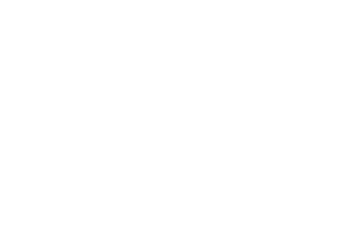

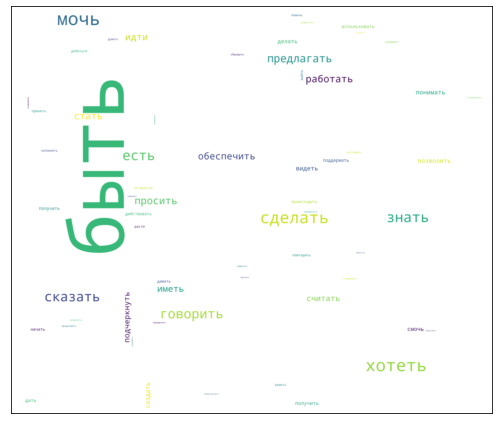

In [ ]:
wc = WordCloud(width=2600, height=2200, background_color="white", relative_scaling=1.0,
               collocations=False, min_font_size=10).generate_from_frequencies(putin_verbs)
plt.axis("off")
plt.figure(figsize=(9, 6))
plt.imshow(wc, interpolation="bilinear")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
file_name = 'putin-verbs-%d.png'
plt.show()

##Вернемся к нашему словарю частотности по каждому из посланий

по нему мы будет считать статистическую меру **TF-IDF**.
Ее можно посчитать кодом, но чтобы понять что это такое и зачем, лучше первые разы считать руками.

**TF-IDF (от англ. TF - term frequency, IDF  - inverse document frequency)**

Мера позволяет оценить вес (важность) слова в контексте документа, являющегося частью корпуса. Вес слова пропорционален частоте его употребления этого слова в этом конкретном тесте и обратно пропорционален частоте употребления слова во всех документах корпуса. 

**TF слова** = количество раз, когда слово встретилось в тексте (частота леммы) / количество всех слов в тексте (кол-во токенов).

**IDF слова** = логарифм(общее количество текстов / количество текстов, в которых встречается слово)

**TF-IDF слова** = TF слова * IDF слова

Обработка результата и расчет TF-IDF по посланиям президента Федеральному собранию РФ - в гуглдоке: https://docs.google.com/spreadsheets/d/1r3x9E3ybfj00zaIx0-ngoDyxk9OmuHpYSN927Awv9UY/edit?usp=sharing